In [1]:
import argparse
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid
from torchvision import datasets

In [5]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()

        # Construct generator. You are free to experiment with your model,
        # but the following is a good start:
        #   Linear args.latent_dim -> 128
        #   LeakyReLU(0.2)
        #   Linear 128 -> 256
        #   Bnorm
        #   LeakyReLU(0.2)
        #   Linear 256 -> 512
        #   Bnorm
        #   LeakyReLU(0.2)
        #   Linear 512 -> 1024
        #   Bnorm
        #   LeakyReLU(0.2)
        #   Linear 1024 -> 784
        #   Output non-linearity
        self.layer_seq = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.layer_seq(z)

In [6]:
latent_dim = 100
g = Generator(100)
i = 5
g.load_state_dict(torch.load(f'gan_results_lisa/k_{i}/gan_k_{i}.pt'))

In [ ]:
# with torch.no_grad():
#     g.eval()
#     noise = torch.randn(64, latent_dim)
#     output = g(noise).view(-1, 28, 28)
    
# idx_1 = 0
# idx_2 = 1

# start_image = output[idx_1]
# start_noise = noise[idx_1]

# end_image = output[idx_2]
# end_noise = noise[idx_2]

# plt.figure()
# plt.subplot(1, 2, 1)
# plt.imshow(start_image, cmap='gray')
# plt.subplot(1, 2, 2)
# plt.imshow(end_image, cmap='gray')

# interpolated = []

# alphas = np.linspace(0, 1, 9)
# for alpha in alphas:
#     img = start_image*(1-alpha) + end_image*alpha
#     interpolated.append(img)

# plt.figure(figsize=(12,6))
# for i, img in enumerate(interpolated):
#     plt.subplot(1, 9, i+1)
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')


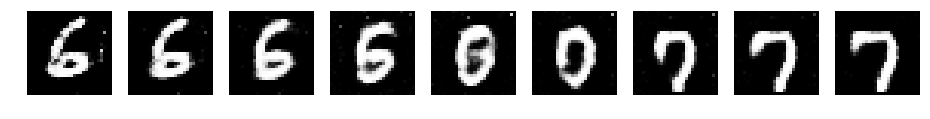

In [12]:
with torch.no_grad():
    g.eval()
    
    input_start = torch.randn(1, latent_dim)
    input_end = torch.randn(1, latent_dim)
    images = []
    alphas = np.linspace(0, 1, 9)
    for a in alphas:
        input_interpol = input_start*(1-a) + input_end*a
        latent_result = g(input_interpol)
        images.append(latent_result)
    
plt.figure(figsize=(16,8))
for i, img in enumerate(images):
    plt.subplot(1, 9, i+1)
    plt.imshow(img.view(28, 28), cmap='gray')
    plt.axis('off')

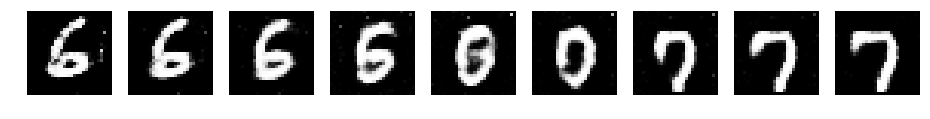

In [13]:
plt.figure(figsize=(16,8))
for i, img in enumerate(images):
    plt.subplot(1, 9, i+1)
    plt.imshow(img.view(28, 28), cmap='gray')
    plt.axis('off')
plt.savefig('gan_interpolation_2.png')

In [3]:
1000 / 1000, 140000 / 1000

(1.0, 140.0)

In [4]:
140 / 2

70.0